In [13]:
# package imports
#basics
import numpy as np
import pandas as pd

#misc
import gc
import time
import warnings


#viz
import matplotlib.pyplot as plt
import seaborn as sns

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")

%matplotlib inline

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap


#graph section
import networkx as nx
import heapq  # for getting top n number of things from list,dict

In [14]:
#importing every dataset
business=pd.read_csv("./yelp_business.csv")
# business_attributes=pd.read_csv("./yelp_business_attributes.csv")
# business_hours=pd.read_csv("./yelp_business_hours.csv")
# check_in=pd.read_csv("./yelp_checkin.csv")
reviews=pd.read_csv("./yelp_review.csv")
# tip=pd.read_csv("./yelp_tip.csv")
# user=pd.read_csv("./yelp_user.csv")
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 50.72299408912659 s


In [15]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [16]:
reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [17]:
business = business[['business_id', 'latitude', 'longitude']]
reviews = reviews[['business_id', 'date', 'stars']]

In [18]:
reviews = reviews.merge(business, on='business_id')

In [19]:
reviews.head()

,business_id,date,stars,latitude,longitude
0,AEx2SYEUJmTxVVB18LlCwA,2016-05-28,5,45.523333,-73.594859
1,AEx2SYEUJmTxVVB18LlCwA,2016-02-22,5,45.523333,-73.594859
2,AEx2SYEUJmTxVVB18LlCwA,2013-03-29,5,45.523333,-73.594859
3,AEx2SYEUJmTxVVB18LlCwA,2017-08-08,5,45.523333,-73.594859
4,AEx2SYEUJmTxVVB18LlCwA,2009-01-17,4,45.523333,-73.594859


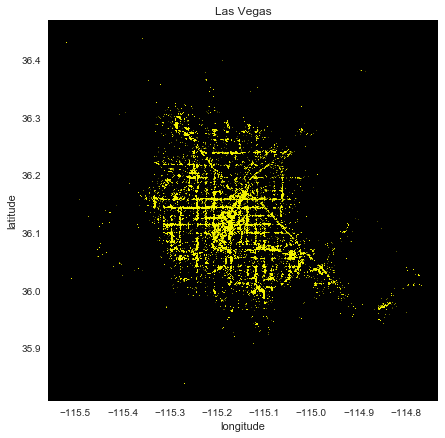

In [20]:
#a random point inside vegas
lat = 36.207430
lon = -115.268460
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for vegas

ratings_data_vegas=reviews[(reviews["longitude"]>lon_min) &\
                    (reviews["longitude"]<lon_max) &\
                    (reviews["latitude"]>lat_min) &\
                    (reviews["latitude"]<lat_max)]

f, ax = plt.subplots(1, 1, figsize=(7,7))
#Facet scatter plot
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax)
ax.set_title("Las Vegas")
ax.set_facecolor('black')

f.show()

In [126]:
from datetime import datetime
year = np.array(np.arange(13)+2005)
month = np.array(np.arange(12) + 1)
date_index = [datetime(i, j, 1) for i in year for j in month]
# date_index = [datetime(i, 1, 1) for i in year]

In [127]:
ratings_data_vegas['date'] = pd.to_datetime(ratings_data_vegas['date'])

In [128]:
data = []
for i in range(len(date_index)-1):
    start = date_index[i]
    end = date_index[i + 1]
    subset=ratings_data_vegas[(ratings_data_vegas['date']>=start) & (ratings_data_vegas['date']<=end)]
    data.append(subset[['latitude','longitude']].values.tolist())

In [144]:
data[10][0]

[36.102250700000006, -115.1699679]

In [201]:
# #initialize at vegas
lat = 36.127430
lon = -115.138460
zoom_start=11
print("                     Vegas Review heatmap Animation ")

# basic map
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)
#inprovising the Heatmapwith time plugin0 to show variations across star ratings 
hm = plugins.HeatMapWithTime(data,max_opacity=0.5,auto_play=True,display_index=True,radius=7)
hm.add_to(m)
m.save("tmp.html")